## 대중교통 통계자료

In [1]:
import pandas as pd

In [4]:
df= pd.read_csv('C:/STUDY/subway_202101.csv', thousands=',')
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34


In [7]:
df['무임승차비율'] = df['무임승차'] / (df['무임승차'] + df['유임승차'])
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,무임승차비율
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34,0.148434
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34,0.535928
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34,0.110555
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34,0.123800
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34,0.374049


- 무임 승차 비율이 가장 높은 역의 승/하차 현황 그래프로 표현

In [11]:
# 무임 승차 비율이 가장 높은 역 전체 현황
df[df['무임승차비율'] == df['무임승차비율'].max()]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,무임승차비율
208,2021-01,경원선,373,소요산,21105,16051,38785,35334,2021-02-03 09:49:34,0.647604


In [12]:
df[df['무임승차비율'] == df['무임승차비율'].max()].iloc[0,4:8]

유임승차    21105
유임하차    16051
무임승차    38785
무임하차    35334
Name: 208, dtype: object

In [14]:
# 유임승차 비율 = (유임승차/전체 승하차 횟수) * 100
station = df[df['무임승차비율'] == df['무임승차비율'].max()]
유임승차 = station['유임승차']
유임하차 = station['유임하차']
무임승차 = station['무임승차']
무임하차 = station['무임하차']
total = df[df['무임승차비율'] == df['무임승차비율'].max()].iloc[0,4:8].sum(axis=0)
print(total)

111275


In [15]:
import matplotlib.pyplot as plt

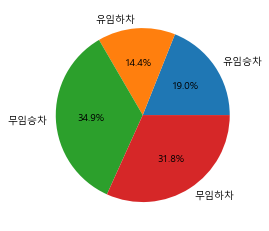

In [16]:
plt.rc('font', family='Malgun Gothic')
plt.pie([유임승차.sum() / total * 100 , 유임하차.sum() / total * 100,
         무임승차.sum() / total * 100 , 무임하차.sum() / total * 100],
       labels=['유임승차', '유임하차','무임승차','무임하차'],
       autopct = '%.1f%%')
plt.show()

- 07 ~ 10시 가장 많은 사람이 타고 내리는 역

In [18]:
columns= pd.read_csv('C:/STUDY/subway_2_202101.csv').columns

In [19]:
df = pd.read_csv('C:/STUDY/subway_2_202101.csv', thousands=',',skiprows=1)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,...,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23,Unnamed: 52
0,2021-01,1호선,1,서울역,445,8,6832,4781,8835,24937,...,3751,32,398,0,2,0,0,0,0,2021-02-03 09:49:40
1,2021-01,1호선,10,동묘앞,78,2,2391,738,2761,3527,...,1502,1,704,0,8,0,0,0,0,2021-02-03 09:49:40
2,2021-01,1호선,2,시청,18,1,1489,2990,2235,14570,...,629,4,48,0,1,0,0,0,0,2021-02-03 09:49:40
3,2021-01,1호선,3,종각,113,1,1852,3464,2578,18288,...,785,10,100,1,1,0,0,0,0,2021-02-03 09:49:40
4,2021-01,1호선,4,종로3가,109,4,2187,2427,2374,8473,...,1104,7,194,0,3,0,0,0,0,2021-02-03 09:49:40


In [21]:
df.columns = columns
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,2021-01,1호선,1,서울역,445,8,6832,4781,8835,24937,...,3751,32,398,0,2,0,0,0,0,2021-02-03 09:49:40
1,2021-01,1호선,10,동묘앞,78,2,2391,738,2761,3527,...,1502,1,704,0,8,0,0,0,0,2021-02-03 09:49:40
2,2021-01,1호선,2,시청,18,1,1489,2990,2235,14570,...,629,4,48,0,1,0,0,0,0,2021-02-03 09:49:40
3,2021-01,1호선,3,종각,113,1,1852,3464,2578,18288,...,785,10,100,1,1,0,0,0,0,2021-02-03 09:49:40
4,2021-01,1호선,4,종로3가,109,4,2187,2427,2374,8473,...,1104,7,194,0,3,0,0,0,0,2021-02-03 09:49:40


In [23]:
df2= df.iloc[:,[3,10,11,12,13,14,15,16,17]]
df2.head()

,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17
0,서울역,27116,66431,43277,145325,31927,91672,29589,44874
1,동묘앞,4457,5734,6977,14687,5588,13409,6386,14013
2,시청,4971,47793,6119,131340,6335,62133,7012,23760
3,종각,4413,77560,6631,165202,7997,100421,10911,42055
4,종로3가,3297,18316,5367,52803,7144,54311,13136,42285


In [24]:
#07~10시 이동인구 합계
df2['출근'] = df2.iloc[:,1:].sum(axis=1)
df2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_10408\2106888324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['출근'] = df2.iloc[:,1:].sum(axis=1)


,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,출근
0,서울역,27116,66431,43277,145325,31927,91672,29589,44874,480211
1,동묘앞,4457,5734,6977,14687,5588,13409,6386,14013,71251
2,시청,4971,47793,6119,131340,6335,62133,7012,23760,289463
3,종각,4413,77560,6631,165202,7997,100421,10911,42055,415190
4,종로3가,3297,18316,5367,52803,7144,54311,13136,42285,196659


In [25]:
# 이동인구 내림차순 정렬
df3= df2.sort_values(by = '출근', ascending=False)
df3.head()

,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,출근
31,강남,29652,120313,46525,260062,37172,253781,37419,121344,906268
41,구로디지털단지,111142,69658,154198,211123,92286,127296,51478,48906,866087
39,신림,169189,26855,259505,50025,152632,42542,76710,35268,812726
508,가산디지털단지,17159,105504,20214,343504,13738,198778,13331,53880,766108
30,역삼,11073,105499,19280,267827,18175,218403,17670,82553,740480


In [28]:
mx = df.iloc[:, range(4,52,2)].max(axis=0).tolist()
mx

[7312,
 32431,
 62867,
 169189,
 259505,
 152632,
 76710,
 64159,
 66910,
 74938,
 86107,
 111104,
 125759,
 190350,
 283331,
 177478,
 159575,
 189419,
 43747,
 11496,
 496,
 3,
 5,
 0]

In [33]:
# x축 역명(시간)
mx_station = []
for i, e in enumerate(mx):
    if e:
        mx_station.append('%s (%s)'
                         % (df[df.iloc[:, i*2+4] == e]['지하철역'].iloc[0], i+4))
        
mx_station

['구로 (4)',
 '신림 (5)',
 '신림 (6)',
 '신림 (7)',
 '신림 (8)',
 '신림 (9)',
 '신림 (10)',
 '신림 (11)',
 '신림 (12)',
 '강남 (13)',
 '강남 (14)',
 '강남 (15)',
 '강남 (16)',
 '강남 (17)',
 '가산디지털단지 (18)',
 '강남 (19)',
 '강남 (20)',
 '강남 (21)',
 '강남 (22)',
 '강남 (23)',
 '부평 (24)',
 '병점 (25)',
 '고속터미널 (26)']

In [36]:
 #len(mx), len(mx_station) 길이가 달라서 그래프그리기 error. mx 수정
mx.pop() # 젤 뒷값 하나 자름

0

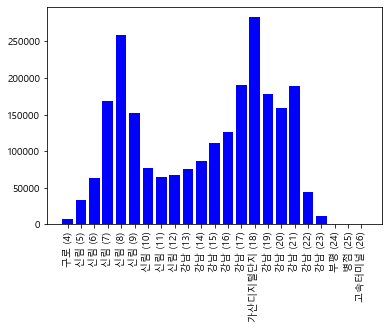

In [38]:
plt.rcParams['axes.unicode_minus']=False

plt.bar(range(len(mx_station)), mx, color='blue')
plt.xticks(range(len(mx_station)), mx_station, rotation=90)
plt.show() 